<a href="https://colab.research.google.com/github/Bash-Code/Projet_Cr-dits_bancaires/blob/main/Projet_Cr%C3%A9dit_bancaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Crédits Bancaires

Réalisé par :   



*   Mohamed EL Baamrani
*   Amaanan Bachar
*   Mohamed Amine Tazroute




**Problématique**

Dans l'apprentissage supervisé, le déséquilibre des classes est une problématique significative qui survient lorsque le nombre d'observations dans les différentes classes d'un jeu de données est inégalement réparti. Cette disparité pose des défis majeurs pour la construction de modèles prédictifs, car elle peut conduire à un biais en faveur de la classe majoritaire, au détriment de la classe minoritaire qui est souvent la plus critique à prédire correctement.

Dans ce projet nous avons explorer quelques méthodes pour remédier à ce problème comme le SMOTE et le Borderline SMOTE.






# Analyse exploratoire des données

L'analyse de données est un processus crucial dans les projets de machine learning. Dans notre cas on a décomposé notre analyse en 3 étapes clés :

1. Analyse de forme
2. Analyse de Fond
3. Analyse des relations entre les  variables et la variable cible (Target)

Chacune de ces étapes a joué un rôle importatndans la compréhension de nos données et la préparation du modèle.



**1. Analyse de forme**

1.1. Introduction :

Cette étape consiste à examiner la structure globale des données.On s'est intéressé dans cette étape à plusieurs aspects tels que la taille du jeu de données (nombre de ligne et colonnes), le type des variables (quantitatives, qualitatives),l'analyse de la variable target, et l'analyse des valeures manquantes.
Cete analyse nous a permise d'avoir une vue d'ensemble sur les données et de planifier l'étape du préprocessing.

1.2. Résultats de l'analyse :

Sur la base des résultats de l'analyse de fond, nous avons un apreçu approffondi du jeu de données.

1. La variable cible (target) :
La variable cible est la variable 'class' qui joue le rôle de la calssification des clients en tant que 'bon' ou 'mauvais'

2. Le jeu de donnée comprend 1000 ligne et 20 colonnes ce qui indique une quantité raisonnable de données pour mener une analyse significative et construire un modèle prédictif.

3. Analyse des variables : parmi les 20 variables on a 13 qualitatives (catégorielle) et 7 quantitatives (numériques) Cette répartition suggère une diversité dans les types de données ce qui peut être bénéfique pour la modélisation car différentes caractéristiques capturent divers aspects du comportement des clients.

4. Analyse des NAN : il n'y a aucune valeure manquante dans le dataset des features. Cela simplifie le processus du prétraitement car il n'est pas nécessaire d'appliquer des techniques d'imputations pour traiter les valeures manquantes.





In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo , list_available_datasets

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [ ]:
statlog_german_credit_data.data.features.head()
statlog_german_credit_data.data.targets.head()

,class
0,1
1,2
2,1
3,1
4,2


In [ ]:
df_features = statlog_german_credit_data.data.features.copy()
df_targets = statlog_german_credit_data.data.targets.copy()
df_complet = statlog_german_credit_data.data.original.copy()

In [ ]:
df_features.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [ ]:
df_targets.head()

,class
0,1
1,2
2,1
3,1
4,2


In [ ]:
df_targets.shape

(1000, 1)

In [ ]:
df_features.shape

(1000, 20)

In [ ]:
df_features.dtypes.value_counts()

object    13
int64      7
dtype: int64

In [ ]:
df_features.isna().sum()/df_features.shape[0]

Attribute1     0.0
Attribute2     0.0
Attribute3     0.0
Attribute4     0.0
Attribute5     0.0
Attribute6     0.0
Attribute7     0.0
Attribute8     0.0
Attribute9     0.0
Attribute10    0.0
Attribute11    0.0
Attribute12    0.0
Attribute13    0.0
Attribute14    0.0
Attribute15    0.0
Attribute16    0.0
Attribute17    0.0
Attribute18    0.0
Attribute19    0.0
Attribute20    0.0
dtype: float64

<Axes: >

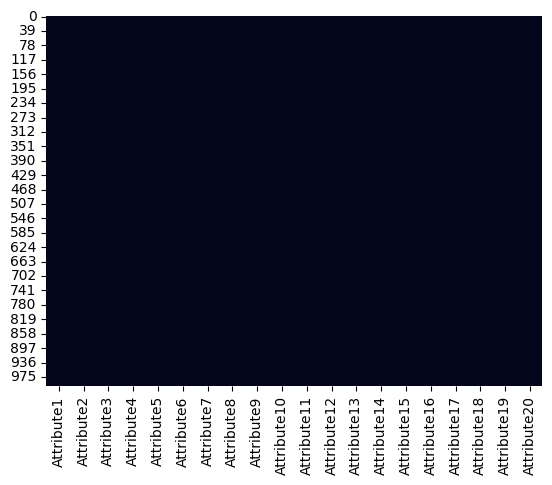

In [ ]:
import seaborn as sns
sns.heatmap(df_features.isna(), cbar =False)

**2. Analyse de fond**

2.1. Introducation

Dans cette partie de l'analyse de fond, nous nous concentrons sur l'exploration détaillée des variables, à la fois quantitatives et qualitatives, de jeu de données.
Cette exploration vise à dégager des tendances, des distributions et des caractéristiques clés qui peuvent influencer la clasfication des client en 'Bon' ou 'Mauvais'.

2.2. Résultats de l'analyse

1. Analyse de la variable cible :
La variable cible révèle un déséquilibre dans la distribution : 70% des clients sont classés comme bon (1) tandis que 30% sont classés comme mauvais(2)
Cette disproportion va influencer la performence du modéle de prédiction nécessitant ainsi des techniques pour traiter l'asymétrie des classes.

2. Analyse des variables quantitatives :  
L'analyse des distributions des variables révèle des informations clés sur les comportements et caractéristiques des clients dans le dataset.

  On remarque que les distributions variables 2,8,11,16,18 sont multimodales.
  
  l'analyse de la variables 2 (Durée du crédit):montre des pics à 15 et 25 mois qui suggère que les clients ont tendance à préférer des crédits à moyen terme.
  
  l'analyse de la variables 8 (taux d'installation) montre un pic dans les pourcentages à 4 indiquant que la plupart des clients optent pour un taux d'installment de 4%.
  
  l'analyse de la variable 11 (Durée d'occupation de la résidence) montre que la majorité des clients occupent leur résidence pendant 2 à 4 mois ce qui peut indiquer une stabilité résidentielle modérée.
  
  l'analyse de la variable 16 (Nombre de crédits Existant) montre un peak sur 1.0 c'est à dire la majorité des clients ont au moins un crédit en cours chez cette banque qui peut signaler une bonne relation entre la banque et ses clients.
  
  l'analyse de la variable 18 (Nombre de personne à charge) montre la majorité des client ont au moins une personne (épouse, parent , enfant) à charge qui peut influencer leur capacité dinancière et leurs besoins en matière de crédit et donc leur comportement en matières d'emprunt.
  
  l'analyse de la variable 5 (Montant du crédit) montre une distribution asymétrique à droite pour le montant du crédit avec la majorité des clients demandant moins de 5000 ce qui pourrait indiquer que les besoins de crédits sont généralement modeste <= 5000
  
  l'analyse de la variable 13 montre aussi une distribution asymétrique asymétrique à droite ----> la majorité des clients sont jeunes 25 ans - 35 ans ce qui peut refléter un groupe démographique actif financièrement, Potentiellement à un stage de la vie où les besoins en matière de crédit pour l'éducation, l'habitation sont plus élevés.

3. Analyse des variables qualitatives :

  variables Nominales (1,3,4,6,9,10,12,14,15,19,20) : ces variables représentent des catégories sans ordre intrinsèque
  variables ordinales (7,17): ces variables représentent des catégories avec un ordre ou classement.




In [ ]:
df_targets

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


In [ ]:
df_targets.value_counts(normalize = True)

class
1        0.7
2        0.3
dtype: float64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_features.select_dtypes('int')

,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


<ipython-input-87-7a82a951ee46>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_features[col])
<ipython-input-87-7a82a951ee46>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_features[col])
<ipython-input-87-7a82a951ee46>:3: UserWarning: 

`distplot` is a deprecated function and will be 

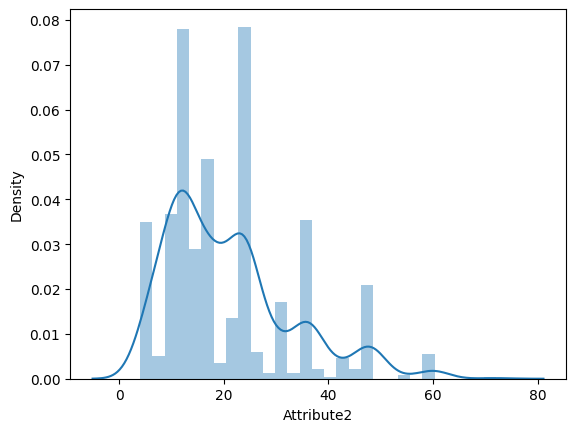

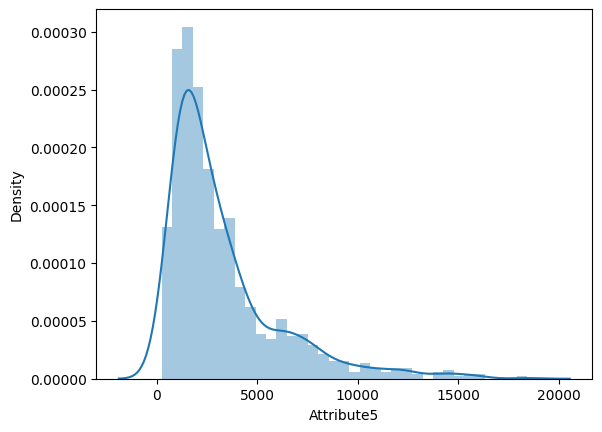

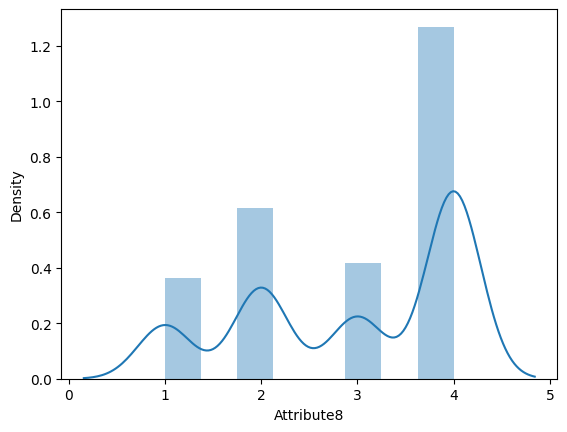

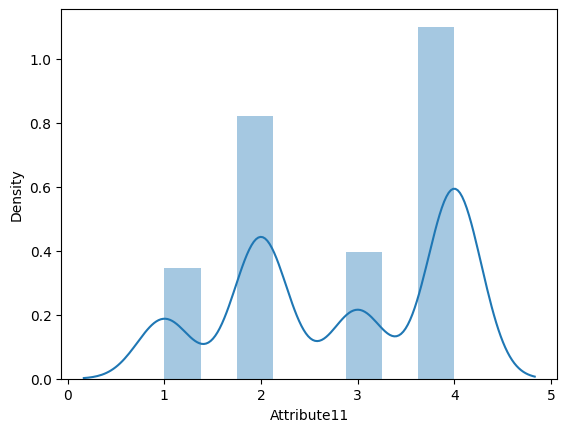

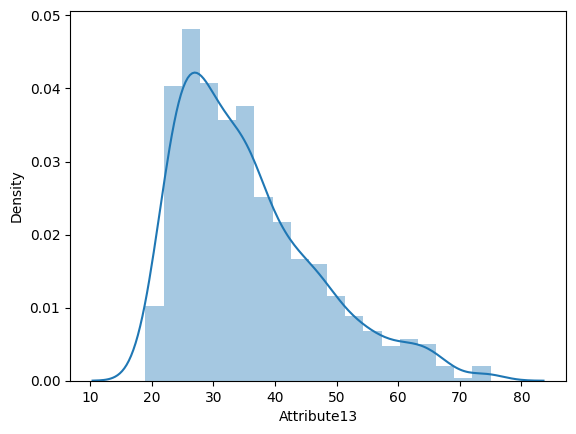

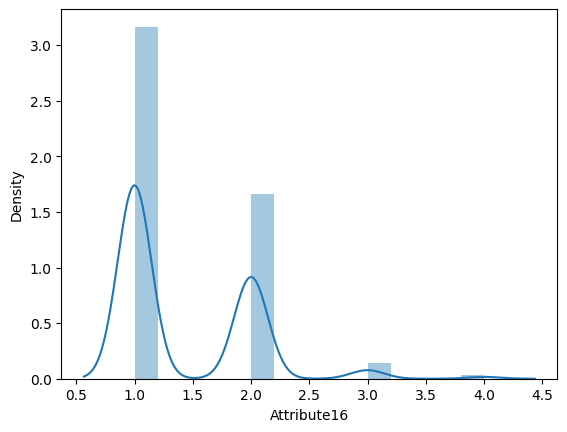

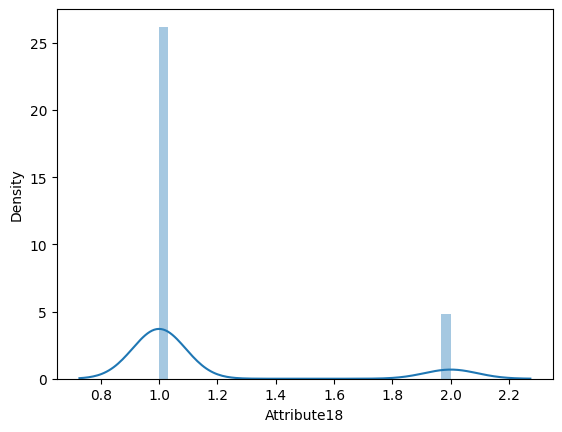

In [ ]:
for col in df_features.select_dtypes('int'):
  plt.figure()
  sns.distplot(df_features[col])

In [ ]:
for col in df_features.select_dtypes('object'):
  print(f'{col :-<50} {df_features[col].unique()}')

Attribute1---------------------------------------- ['A11' 'A12' 'A14' 'A13']
Attribute3---------------------------------------- ['A34' 'A32' 'A33' 'A30' 'A31']
Attribute4---------------------------------------- ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Attribute6---------------------------------------- ['A65' 'A61' 'A63' 'A64' 'A62']
Attribute7---------------------------------------- ['A75' 'A73' 'A74' 'A71' 'A72']
Attribute9---------------------------------------- ['A93' 'A92' 'A91' 'A94']
Attribute10--------------------------------------- ['A101' 'A103' 'A102']
Attribute12--------------------------------------- ['A121' 'A122' 'A124' 'A123']
Attribute14--------------------------------------- ['A143' 'A141' 'A142']
Attribute15--------------------------------------- ['A152' 'A153' 'A151']
Attribute17--------------------------------------- ['A173' 'A172' 'A174' 'A171']
Attribute19--------------------------------------- ['A192' 'A191']
Attribute20---------------------

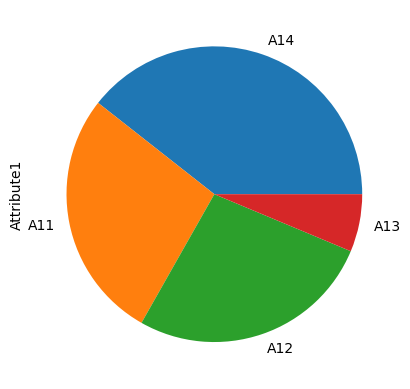

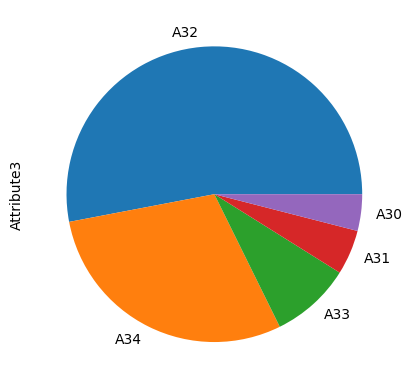

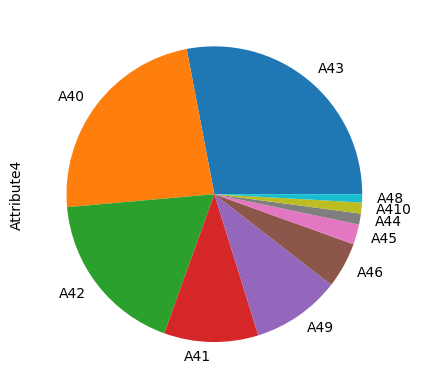

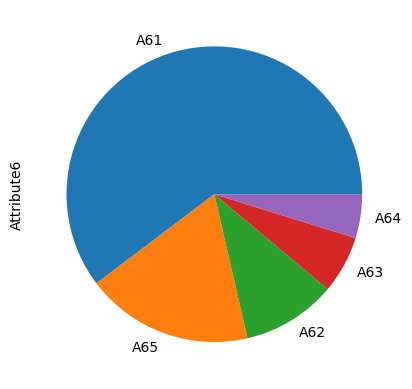

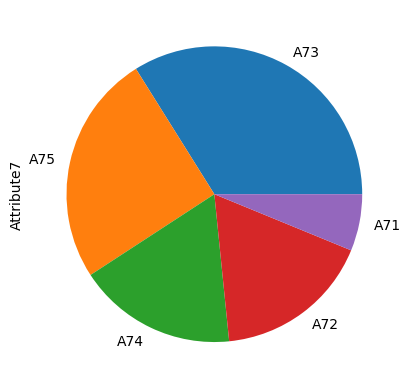

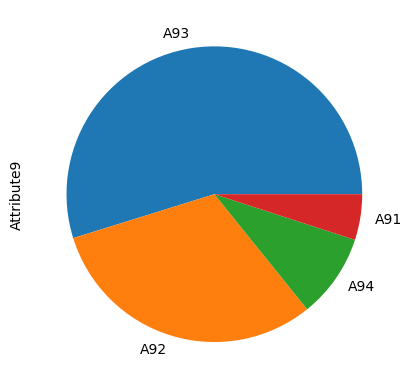

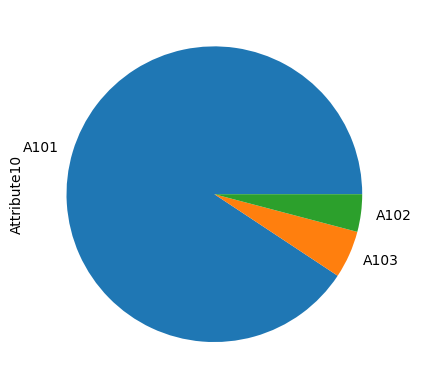

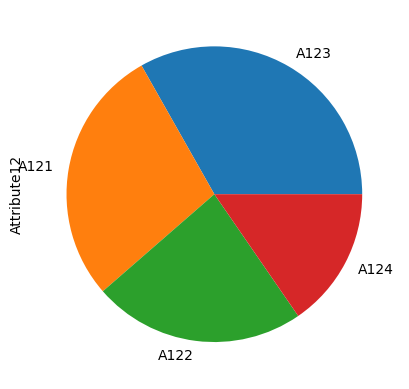

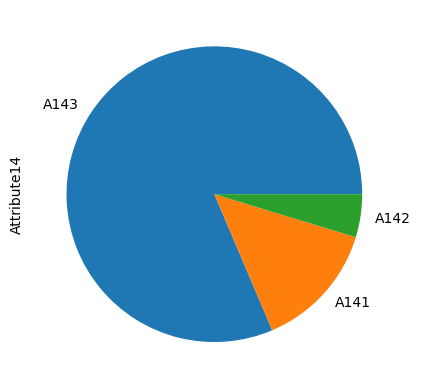

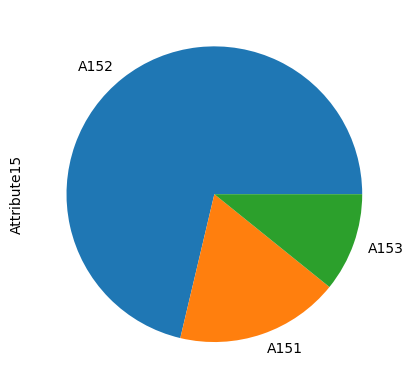

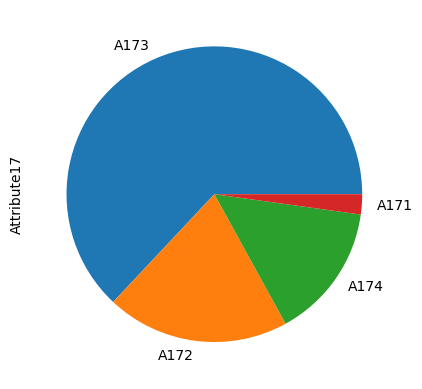

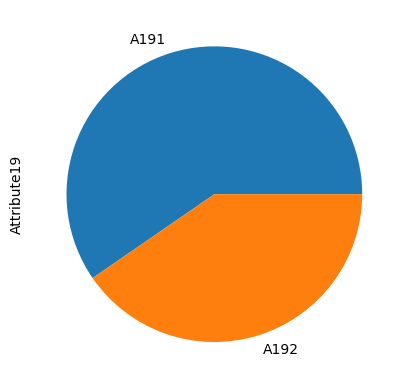

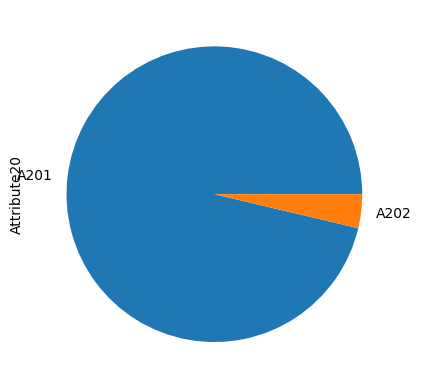

In [ ]:
for col in df_features.select_dtypes('object'):
  plt.figure()
  df_features[col].value_counts().plot.pie()

**3. Relation entre les variables et la variable cible**

1. relation entres les Variables Quantitativeset la variable target  :    
Dans cette partie nous cherchons à comprendre les facteurs influençant la variable cible.

2. relation entre les variables/target :

   L'analyse des distribution des variables montre qu'il y a une difference potentielle entre la distribution des variables 2, 3 et 13 entre les bon clients et les mauvais mais c'est une hypothése à tester.
   nous avons utiliser des distplot()

   Nous avons mener une analyse similaire entre les variables qualitatives et la variable cible
   pour voir comment chacune d'entre elle affecte la variable cible.
   nous avons utiliser des crosstab()

3. Hypothèses
H_0 il n'y a pas une difference significative entre les moyennes des deux classes selon la variable i


4. test d'hypothéses
nous avons appliquer un test-t sur les variables quantitatives et un test chi-carré sur les variables qualitatives.



In [ ]:
df_bon_client = df_complet[df_complet['class']==1]
df_mauvais_client = df_complet[df_complet['class']==2]

<ipython-input-91-f63c11ff3e25>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bon_client[col], label='bon client')
<ipython-input-91-f63c11ff3e25>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mauvais_client[col], label='mauvais client')
<ipython-input-91-f63c11ff3e25>:3: UserWarning

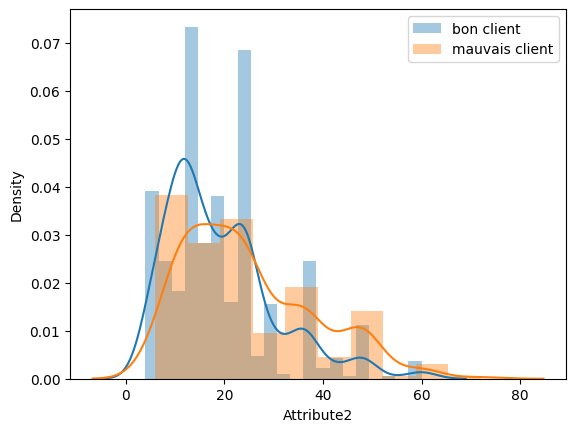

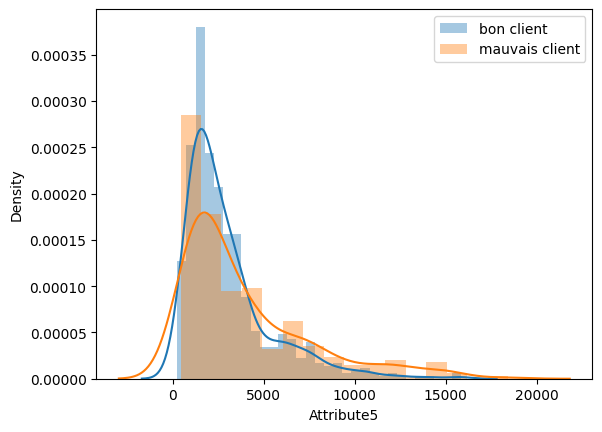

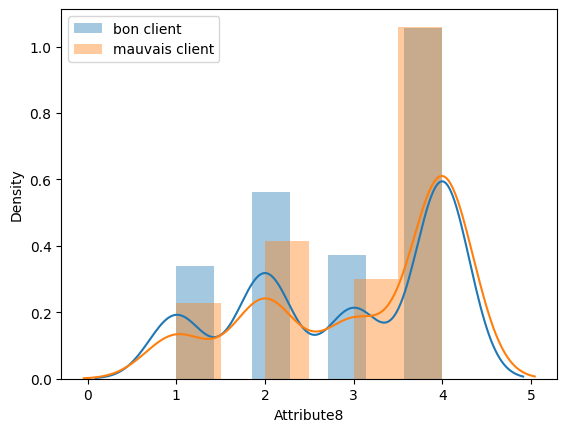

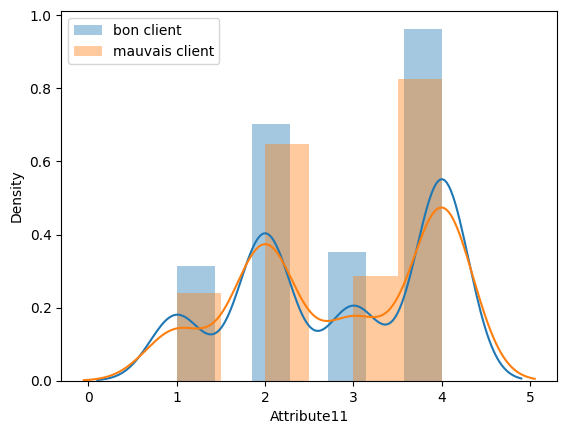

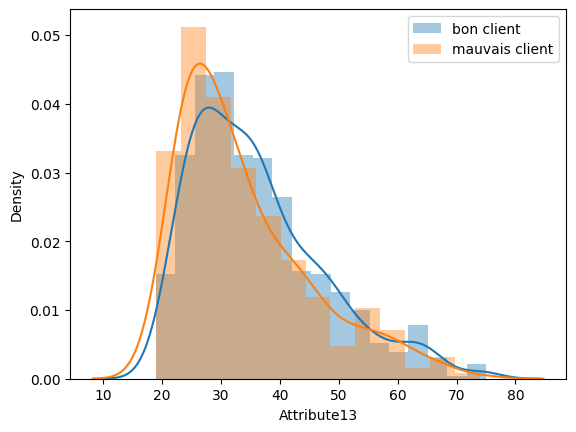

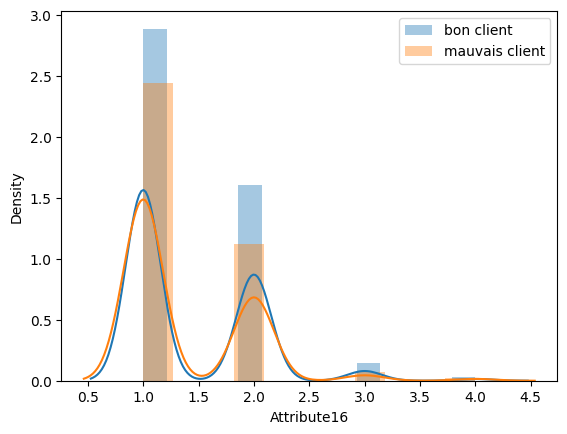

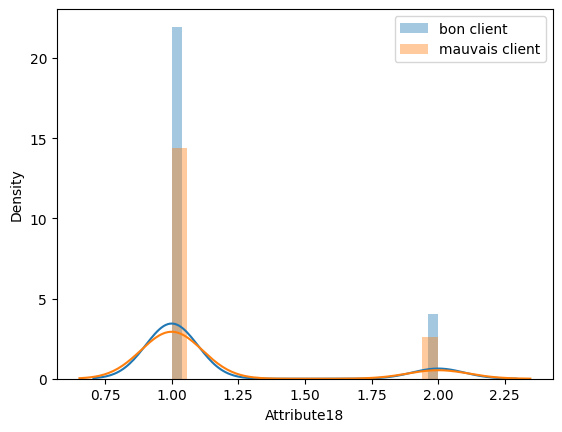

In [ ]:
for col in df_features.select_dtypes('int'):
  plt.figure()
  sns.distplot(df_bon_client[col], label='bon client')
  sns.distplot(df_mauvais_client[col], label='mauvais client')
  plt.legend()

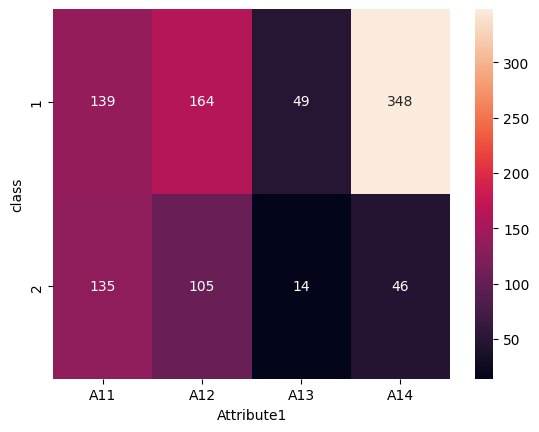

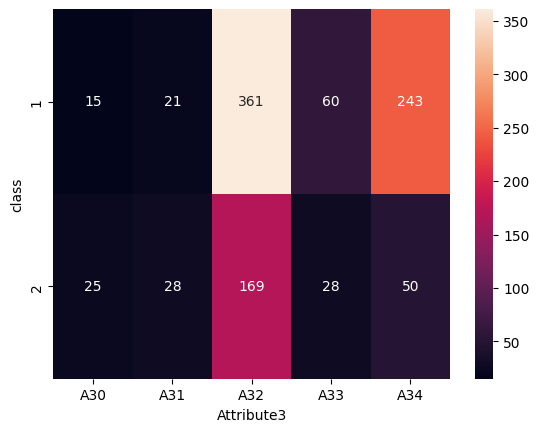

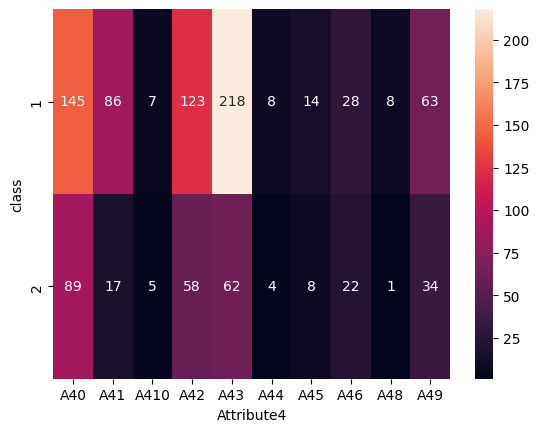

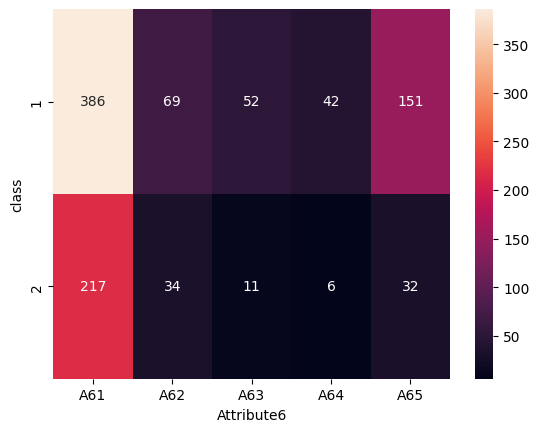

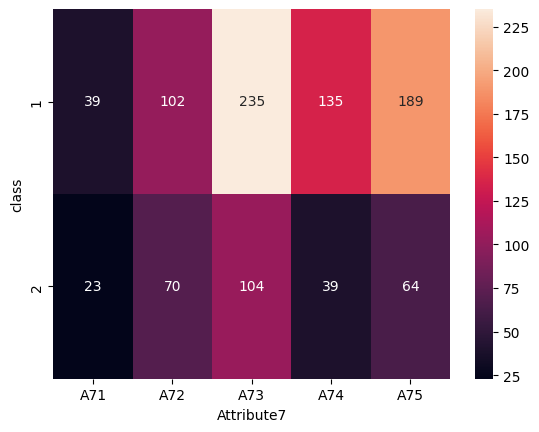

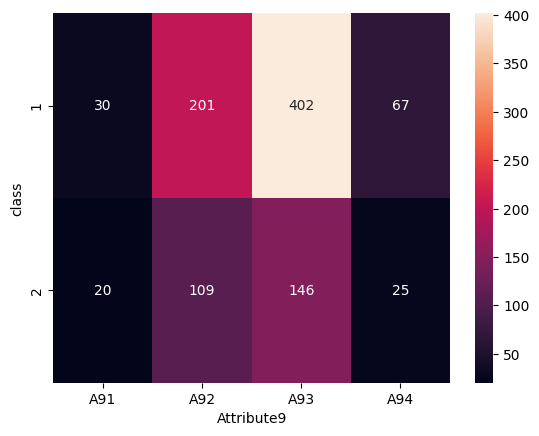

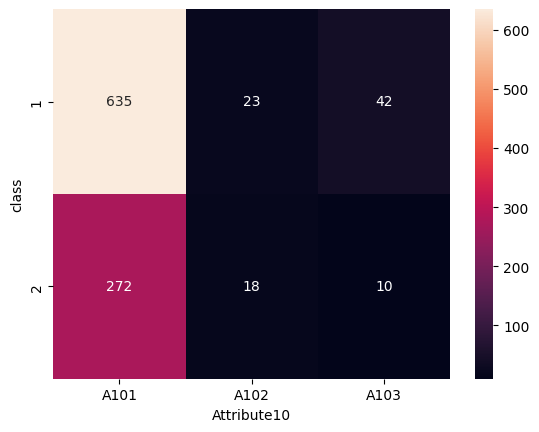

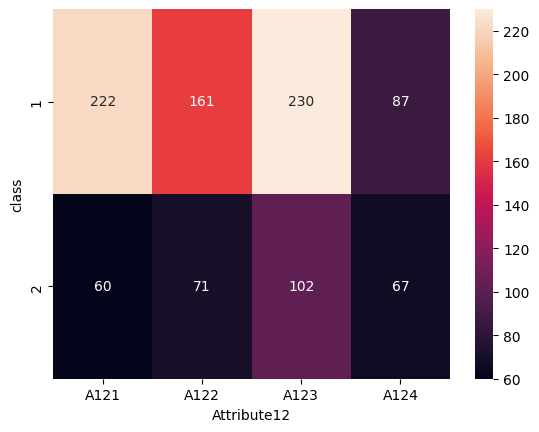

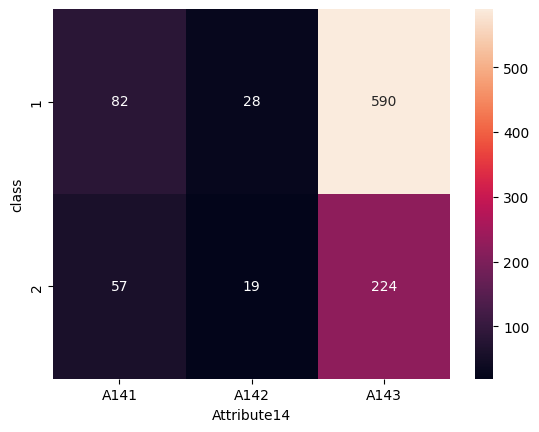

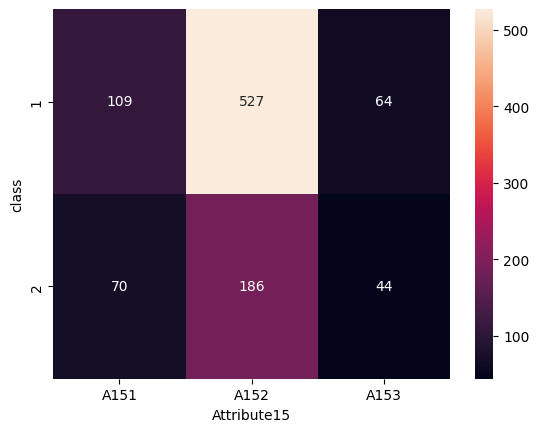

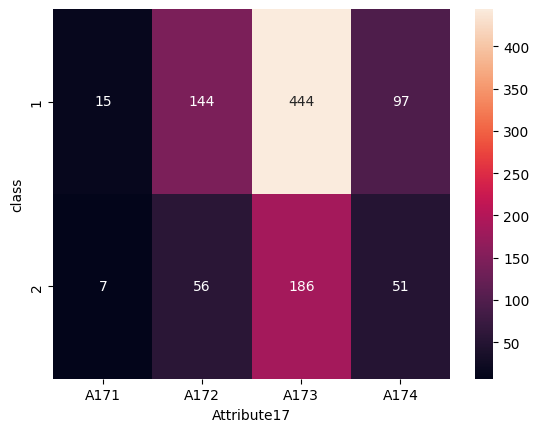

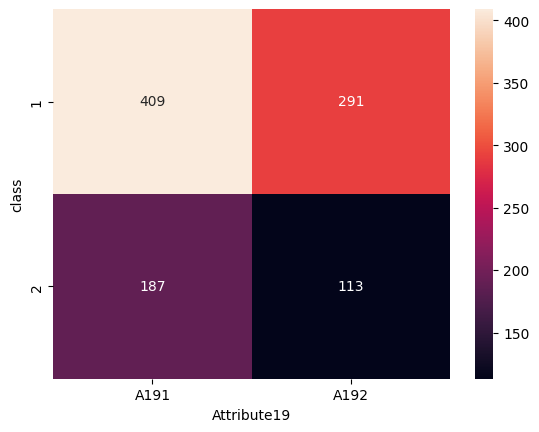

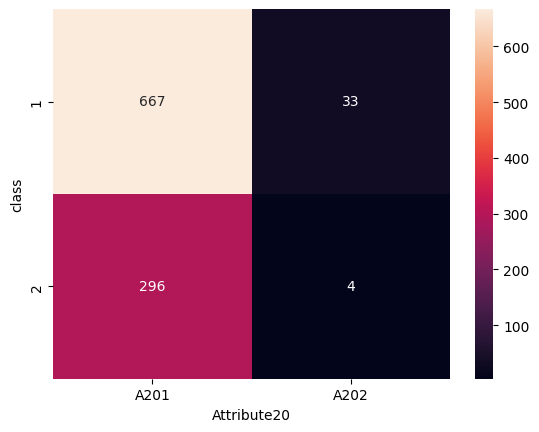

In [ ]:
import pandas as pd

for col in df_features.select_dtypes('object'):
  plt.figure()
  sns.heatmap(pd.crosstab(df_targets['class'], df_features[col]), annot=True, fmt='d')


In [ ]:
df_bon_client.shape

(700, 21)

In [ ]:
df_mauvais_client.shape

(300, 21)

In [ ]:
balaced_bon_client_df = df_bon_client.sample(df_mauvais_client.shape[0])

In [ ]:
balaced_bon_client_df.shape

(300, 21)

In [ ]:
from scipy.stats import ttest_ind
def t_test(col):
  alpha = 0.05
  stat, p = ttest_ind(balaced_bon_client_df[col], df_mauvais_client[col])
  if p < alpha:
    return 'H0 rejetée'
  else :
    return 0

In [ ]:
from scipy.stats import chi2_contingency

def chi_squared_test(col):
  alpha = 0.05
  chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_targets['class'], df_features[col]))
  if p < alpha :
    return 'H0 rejectée'
  else :
    return 0


In [ ]:
for col in df_features.select_dtypes('int'):
  print(f'{col:-<50} {t_test(col)}')

Attribute2---------------------------------------- H0 rejetée
Attribute5---------------------------------------- H0 rejetée
Attribute8---------------------------------------- H0 rejetée
Attribute11--------------------------------------- 0
Attribute13--------------------------------------- H0 rejetée
Attribute16--------------------------------------- 0
Attribute18--------------------------------------- 0


In [ ]:
for col in df_features.select_dtypes('object'):
  print(f'{col:-<50} {chi_squared_test(col)}')

Attribute1---------------------------------------- H0 rejectée
Attribute3---------------------------------------- H0 rejectée
Attribute4---------------------------------------- H0 rejectée
Attribute6---------------------------------------- H0 rejectée
Attribute7---------------------------------------- H0 rejectée
Attribute9---------------------------------------- H0 rejectée
Attribute10--------------------------------------- H0 rejectée
Attribute12--------------------------------------- H0 rejectée
Attribute14--------------------------------------- H0 rejectée
Attribute15--------------------------------------- H0 rejectée
Attribute17--------------------------------------- 0
Attribute19--------------------------------------- 0
Attribute20--------------------------------------- H0 rejectée


# Preprocessing et Création des modèles

Dans cette partie, suite à notre analyse exploratoire des données nous avons effectuer un preprocessing dans lequel nous avons fait les traitements suivants :   

One-Hot encoding pour les variables catégoriques

label encoding pour la variable target

normalisation MinMaxscaler sur les variables numériques

Les modèles choisis sont les suivants :    


*   Decision Tree
*   Random Forests
*   Logistic regression
*   KNN
*   LDA
*   QDA
*   SVM
*   Gradient Boosting
*   Naive Bayes











In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [ ]:
def preprocessing(data_frame):
  X = data_frame.drop('class', axis=1)
  y = data_frame['class']

  categorical_vars = X.select_dtypes('object').columns
  numerical_vars = X.select_dtypes(include=['int64', 'float64']).columns

  one_hot_transformer = ColumnTransformer([('o', OneHotEncoder(), categorical_vars)], remainder='passthrough')
  X_transformed = one_hot_transformer.fit_transform(X)

  new_categorical_columns = one_hot_transformer.named_transformers_['o'].get_feature_names_out(categorical_vars)
  all_columns = new_categorical_columns.tolist() + numerical_vars.tolist()

  X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)

  normalize_transformer = MinMaxScaler()
  X_transformed_df[numerical_vars] = normalize_transformer.fit_transform(X_transformed_df[numerical_vars])

  y_encoded = LabelEncoder().fit_transform(y)
  y_encoded_df = pd.DataFrame(y_encoded, columns=['class'])

  return X_transformed_df, y_encoded_df


In [ ]:
trainset, testset = train_test_split(df_complet, test_size = 0.2, random_state=0)

In [ ]:
trainset['class'].value_counts()

1    558
2    242
Name: class, dtype: int64

In [ ]:
testset['class'].value_counts()

1    142
2     58
Name: class, dtype: int64

In [ ]:
X_train, y_train = preprocessing(trainset)

In [ ]:
X_train.columns

Index(['Attribute1_A11', 'Attribute1_A12', 'Attribute1_A13', 'Attribute1_A14',
       'Attribute3_A30', 'Attribute3_A31', 'Attribute3_A32', 'Attribute3_A33',
       'Attribute3_A34', 'Attribute4_A40', 'Attribute4_A41', 'Attribute4_A410',
       'Attribute4_A42', 'Attribute4_A43', 'Attribute4_A44', 'Attribute4_A45',
       'Attribute4_A46', 'Attribute4_A48', 'Attribute4_A49', 'Attribute6_A61',
       'Attribute6_A62', 'Attribute6_A63', 'Attribute6_A64', 'Attribute6_A65',
       'Attribute7_A71', 'Attribute7_A72', 'Attribute7_A73', 'Attribute7_A74',
       'Attribute7_A75', 'Attribute9_A91', 'Attribute9_A92', 'Attribute9_A93',
       'Attribute9_A94', 'Attribute10_A101', 'Attribute10_A102',
       'Attribute10_A103', 'Attribute12_A121', 'Attribute12_A122',
       'Attribute12_A123', 'Attribute12_A124', 'Attribute14_A141',
       'Attribute14_A142', 'Attribute14_A143', 'Attribute15_A151',
       'Attribute15_A152', 'Attribute15_A153', 'Attribute17_A171',
       'Attribute17_A172', 'Attrib

In [ ]:
X_test, y_test = preprocessing(testset)

In [ ]:
y_train.value_counts()

class
0        558
1        242
dtype: int64

In [ ]:
y_test.value_counts()

class
0        142
1         58
dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelDT = DecisionTreeClassifier()

In [ ]:
modelRF = RandomForestClassifier()


In [ ]:
modelLR = LogisticRegression()

In [ ]:
modelSVC = SVC()

In [ ]:
modelKNN = KNeighborsClassifier()

In [ ]:
modelLDA = LinearDiscriminantAnalysis()

In [ ]:
modelQDA = QuadraticDiscriminantAnalysis()

In [ ]:
modelGBC = GradientBoostingClassifier()

In [ ]:
modelGNB = GaussianNB()

In [ ]:
dict_models = {'Decision Tree':modelDT, 'Random Forest': modelRF, 'Logistic regression': modelLR, 'SVM': modelSVC, 'KNN': modelKNN, 'LDA' : modelLDA, 'QDA' : modelQDA, 'Gradient Boosting': modelGBC, 'Naive bayes' : modelGNB}

# Entrainement et évaluation des modèles

   L'évaluation des modèles est une étape critique dans le processus de modélisation, permettant de déterminer la performance de chaque algorithme et sa capacité à généraliser à de nouvelles données. Dans notre cas, cette évaluation est d'autant plus importante que nous sommes confrontés au défi du déséquilibre des classes dans notre variable cible.




   Pour aborder ce déséquilibre, nous avons évalué initialement nos modèles sur les données non traitées pour établir une référence de leur performance. Cette évaluation inclut des métriques telles que la précision, le rappel, le score F1,le score F2 avec un beta > 1 pour favoriser le recall, et l'exactitude (accuracy), qui fournissent une vue complète de la performance du modèle au-delà de la simple précision.


   une analyse des résultats du  rapport de classification et des autres mesures notemment la mesure F2, nous montre que le modèle performe bien sur la classe (bon=0) mais mal sur la classe (mauvais=1).

   la performence reste modeste même aprés l'application d'une grid search pour améliorer la performence des modèles en trouvant les meilleurs hyperparamétres pour chacun d'entre eux.



In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV
import numpy as np
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from numpy import mean


In [ ]:
def evaluation(X_train,y_train,X_test,y_test,model):
  model.fit(X_train,y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  f_2_par_classe = fbeta_score(y_test,ypred, beta=2, average = None)
  f_2 = fbeta_score(y_test,ypred, beta=2)
  print(f'f-2 mesure pour chaque classe: {f_2_par_classe}')
  print(f'f-2 mesure: {f_2}')

  print(f'precision score : {precision_score(y_test,ypred)}')
  print(f'recall score score : {recall_score(y_test,ypred)}')
  print(f'f1 score : {f1_score(y_test,ypred)}')
  print(f'accuracy score : {accuracy_score(y_test,ypred)}')


In [ ]:
for name, model in dict_models.items():
  print(name)
  evaluation(X_train,y_train,X_test,y_test,model)
  print("\n \n")

Decision Tree
[[102  40]
 [ 35  23]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       142
           1       0.37      0.40      0.38        58

    accuracy                           0.62       200
   macro avg       0.55      0.56      0.56       200
weighted avg       0.63      0.62      0.63       200

f-2 mesure pour chaque classe: [0.72340426 0.38983051]
f-2 mesure: 0.3898305084745763
precision score : 0.36507936507936506
recall score score : 0.39655172413793105
f1 score : 0.38016528925619836
accuracy score : 0.625

 

Random Forest


<ipython-input-123-686e78c6d843>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


[[126  16]
 [ 30  28]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       142
           1       0.64      0.48      0.55        58

    accuracy                           0.77       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200

f-2 mesure pour chaque classe: [0.87016575 0.50724638]
f-2 mesure: 0.5072463768115942
precision score : 0.6363636363636364
recall score score : 0.4827586206896552
f1 score : 0.5490196078431373
accuracy score : 0.77

 

Logistic regression
[[117  25]
 [ 26  32]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       142
           1       0.56      0.55      0.56        58

    accuracy                           0.74       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.74      0.74      0.74       200

f-2 mesure pour chaque classe: [0.82278481 0.55363322]
f-2 mesure: 0.5536332179930795
precision score : 0.5614035087719298
recall score score : 0.5517241379310345
f1 score : 0.5565217391304348
accuracy score : 0.745

 

SVM


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[123  19]
 [ 33  25]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       142
           1       0.57      0.43      0.49        58

    accuracy                           0.74       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.72      0.74      0.73       200

f-2 mesure pour chaque classe: [0.84944751 0.45289855]
f-2 mesure: 0.4528985507246377
precision score : 0.5681818181818182
recall score score : 0.43103448275862066
f1 score : 0.4901960784313726
accuracy score : 0.74

 

KNN
[[121  21]
 [ 34  24]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       142
           1       0.53      0.41      0.47        58

    accuracy                           0.73       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.72      0.71       200

f-2 mesure pour chaque classe: [0.83679115 0.433213  ]
f-2 mesure: 0.4332129

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


f-2 mesure pour chaque classe: [0.80985915 0.53448276]
f-2 mesure: 0.5344827586206896
precision score : 0.5344827586206896
recall score score : 0.5344827586206896
f1 score : 0.5344827586206896
accuracy score : 0.73

 

QDA
[[120  22]
 [ 33  25]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       142
           1       0.53      0.43      0.48        58

    accuracy                           0.73       200
   macro avg       0.66      0.64      0.64       200
weighted avg       0.71      0.72      0.72       200

f-2 mesure pour chaque classe: [0.83217753 0.44802867]
f-2 mesure: 0.4480286738351254
precision score : 0.5319148936170213
recall score score : 0.43103448275862066
f1 score : 0.4761904761904762
accuracy score : 0.725

 

Gradient Boosting


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[117  25]
 [ 27  31]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       142
           1       0.55      0.53      0.54        58

    accuracy                           0.74       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200

f-2 mesure pour chaque classe: [0.82162921 0.53819444]
f-2 mesure: 0.5381944444444444
precision score : 0.5535714285714286
recall score score : 0.5344827586206896
f1 score : 0.5438596491228069
accuracy score : 0.74

 

Naive bayes
[[96 46]
 [17 41]]
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       142
           1       0.47      0.71      0.57        58

    accuracy                           0.69       200
   macro avg       0.66      0.69      0.66       200
weighted avg       0.74      0.69      0.70       200

f-2 mesure pour chaque classe: [0.70484581 0.64263323]
f-2 mesure: 0.6426

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
param_grid_knn = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance']}
param_grid_lda = {'solver': ['svd', 'lsqr']}
param_grid_qda = {'reg_param': np.linspace(0, 1, num=50)}  # QDA n'a pas de paramètres clairs à ajuster qui sont universels
param_grid_gbc = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
param_grid_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
dict_models_ = {
    'Decision Tree': (modelDT, param_grid_dt),
    'Random Forest': (modelRF, param_grid_rf),
    'Logistic regression': (modelLR, param_grid_lr),
    'SVM': (modelSVC, param_grid_svc),
    'KNN': (modelKNN, param_grid_knn),
    'LDA': (modelLDA, param_grid_lda),
    'QDA': (modelQDA, param_grid_qda),
    'Gradient Boosting': (modelGBC, param_grid_gbc),
    'Naive bayes': (modelGNB, param_grid_gnb)
}

In [ ]:
scorers = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'f2': make_scorer(fbeta_score, beta=2)
}
best_models = {}
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for model_name, (model, params) in dict_models_.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=stratified_kfold, scoring=scorers,refit='f2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Stockage du meilleur modèle et affichage des résultats
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} - Meilleurs paramètres: {grid_search.best_params_}")
    print(f"{model_name} - Meilleur score de validation croisée: {grid_search.best_score_}")

    results = grid_search.cv_results_
    for metric in scorers.keys():
        mean_test_score = results[f'mean_test_{metric}'][grid_search.best_index_]
        print(f"{model_name} - Cross-Validation {metric.capitalize()} Score: {mean_test_score}")
    print("\n\n")

Decision Tree - Meilleurs paramètres: {'max_depth': 20, 'min_samples_split': 2}
Decision Tree - Meilleur score de validation croisée: 0.5025532191702851
Decision Tree - Cross-Validation Precision Score: 0.4829059829059829
Decision Tree - Cross-Validation Recall Score: 0.5079732510288065
Decision Tree - Cross-Validation F1 Score: 0.49481936434224655
Decision Tree - Cross-Validation Accuracy Score: 0.6874771197657065
Decision Tree - Cross-Validation F2 Score: 0.5025532191702851





/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Random Forest - Meilleurs paramètres: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest - Meilleur score de validation croisée: 0.4623712860897806
Random Forest - Cross-Validation Precision Score: 0.6693380614657211
Random Forest - Cross-Validation Recall Score: 0.42978395061728397
Random Forest - Cross-Validation F1 Score: 0.5222396575123578
Random Forest - Cross-Validation Accuracy Score: 0.7612805421794185
Random Forest - Cross-Validation F2 Score: 0.4623712860897806





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic regression - Meilleurs paramètres: {'C': 10, 'penalty': 'l2'}
Logistic regression - Meilleur score de validation croisée: 0.5129530119111666
Logistic regression - Cross-Validation Precision Score: 0.5979347161406374
Logistic regression - Cross-Validation Recall Score: 0.49567901234567907
Logistic regression - Cross-Validation F1 Score: 0.5415145998647005
Logistic regression - Cross-Validation Accuracy Score: 0.7462382548130626
Logistic regression - Cross-Validation F2 Score: 0.5129530119111666





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM - Meilleurs paramètres: {'C': 10, 'kernel': 'rbf'}
SVM - Meilleur score de validation croisée: 0.5353480623073074
SVM - Cross-Validation Precision Score: 0.5834644229010427
SVM - Cross-Validation Recall Score: 0.5246913580246914
SVM - Cross-Validation F1 Score: 0.552295526308436
SVM - Cross-Validation Accuracy Score: 0.7424882430796091
SVM - Cross-Validation F2 Score: 0.5353480623073074





/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN - Meilleurs paramètres: {'n_neighbors': 1, 'weights': 'uniform'}
KNN - Meilleur score de validation croisée: 0.43934317659433564
KNN - Cross-Validation Precision Score: 0.4834343434343434
KNN - Cross-Validation Recall Score: 0.42978395061728397
KNN - Cross-Validation F1 Score: 0.45468914646996844
KNN - Cross-Validation Accuracy Score: 0.6875334403424292
KNN - Cross-Validation F2 Score: 0.43934317659433564





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA - Meilleurs paramètres: {'solver': 'lsqr'}
LDA - Meilleur score de validation croisée: 0.6068894898879904
LDA - Cross-Validation Precision Score: 0.5077767422595009
LDA - Cross-Validation Recall Score: 0.6661008230452675
LDA - Cross-Validation F1 Score: 0.5539740505656513
LDA - Cross-Validation Accuracy Score: 0.6673190466803712
LDA - Cross-Validation F2 Score: 0.6068894898879904





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA - Meilleurs paramètres: {'reg_param': 0.04081632653061224}
QDA - Meilleur score de validation croisée: 0.5305542368910696
QDA - Cross-Validation Precision Score: 0.5778667637422643
QDA - Cross-Validation Recall Score: 0.5205761316872427
QDA - Cross-Validation F1 Score: 0.5467954594722678
QDA - Cross-Validation Accuracy Score: 0.7387616982531234
QDA - Cross-Validation F2 Score: 0.5305542368910696





/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting - Meilleurs paramètres: {'learning_rate': 0.1, 'n_estimators': 200}
Gradient Boosting - Meilleur score de validation croisée: 0.5091211908981811
Gradient Boosting - Cross-Validation Precision Score: 0.5958368449193016
Gradient Boosting - Cross-Validation Recall Score: 0.4915637860082305
Gradient Boosting - Cross-Validation F1 Score: 0.5381983986489619
Gradient Boosting - Cross-Validation Accuracy Score: 0.7449945087437695
Gradient Boosting - Cross-Validation F2 Score: 0.5091211908981811



Naive bayes - Meilleurs paramètres: {'var_smoothing': 1.519911082952933e-07}
Naive bayes - Meilleur score de validation croisée: 0.619594466576201
Naive bayes - Cross-Validation Precision Score: 0.49179556444125644
Naive bayes - Cross-Validation Recall Score: 0.689917695473251
Naive bayes - Cross-Validation F1 Score: 0.554260273989288
Naive bayes - Cross-Validation Accuracy Score: 0.6563365342194437
Naive bayes - Cross-Validation F2 Score: 0.619594466576201





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Entrainement et évaluation des modèles aprés équilibre de données en SMOTE

Dans cette partie nous avons choisi la méthode SMOTE pour remédier au probléme de déséquilibre des données, puis nous avons effectué une réevaluation sur le modéle.

**Principe de la méthode SMOTE**

La méthode SMOTE, acronyme de Synthetic Minority Over-sampling Technique, est une technique de rééchantillonnage avancée largement utilisée pour adresser le problème du déséquilibre des classes dans les ensembles de données de classification. Contrairement au suréchantillonnage traditionnel qui réplique simplement les exemples de la classe minoritaire, SMOTE génère de nouvelles instances synthétiques en se basant sur les caractéristiques des exemples existants.

Le principe sous-jacent de SMOTE est de créer des exemples artificiels mais plausibles en interpollant de nouveaux points entre des exemples existants de la classe minoritaire. Pour chaque instance de la classe minoritaire, SMOTE trouve ses plus proches voisins dans le même groupe (typiquement, on utilise l'algorithme des k-plus proches voisins, ou k-NN). Ensuite, il sélectionne un ou plusieurs des voisins les plus proches et insère des points de données synthétiques le long des lignes qui joignent ces exemples de la classe minoritaire et leurs voisins.

Ce processus se traduit par une insertion aléatoire de nouveaux points le long du segment de ligne entre deux exemples, ce qui permet d'introduire de la variabilité tout en restant fidèle à la distribution originale de la classe minoritaire. Cela aide à diversifier les exemples de la classe minoritaire sans les reproduire exactement, évitant ainsi le surajustement potentiel qui peut résulter du simple suréchantillonnage par duplication.

**Analyse des résultats aprés smote**

L'ensemble des scores aprés l'application de la méthode smote sur le trainset avec une grid search sur les hyperparamétres des modèles ont augmenté.

à titre d'exemple :    
on pourra remarquer que le recall du SVM a passé de 0.52 à 0.89. le F2 également a passé de 0.53 à 0.87.

le KNN a obtenu le meilleur recall 0.94 aprés l'application de SMOTE



In [ ]:
def smote(data_frame):
  X, y = preprocessing(data_frame)
  oversample = SMOTE()
  X, y_resampled = oversample.fit_resample(X, y['class'])
  y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])
  return X, y_resampled_df

In [ ]:
X_train_smote, y_train_smote = smote(trainset)

In [ ]:
y_train_smote.value_counts()

class
0        558
1        558
dtype: int64

**optimisation**

In [ ]:
scorers = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'f2': make_scorer(fbeta_score, beta=2)
}
best_models = {}
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for model_name, (model, params) in dict_models_.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=stratified_kfold, scoring=scorers,refit='f2', n_jobs=-1)
    grid_search.fit(X_train_smote, y_train_smote)

    # Stockage du meilleur modèle et affichage des résultats
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} - Meilleurs paramètres: {grid_search.best_params_}")
    print(f"{model_name} - Meilleur score de validation croisée: {grid_search.best_score_}")

    results = grid_search.cv_results_
    for metric in scorers.keys():
        mean_test_score = results[f'mean_test_{metric}'][grid_search.best_index_]
        print(f"{model_name} - Cross-Validation {metric.capitalize()} Score: {mean_test_score}")
    print("\n\n")

Decision Tree - Meilleurs paramètres: {'max_depth': 10, 'min_samples_split': 2}
Decision Tree - Meilleur score de validation croisée: 0.760322441093226
Decision Tree - Cross-Validation Precision Score: 0.7573281259018726
Decision Tree - Cross-Validation Recall Score: 0.7616487455197133
Decision Tree - Cross-Validation F1 Score: 0.7587684354657517
Decision Tree - Cross-Validation Accuracy Score: 0.7580645161290324
Decision Tree - Cross-Validation F2 Score: 0.760322441093226





/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Random Forest - Meilleurs paramètres: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - Meilleur score de validation croisée: 0.8366886494550346
Random Forest - Cross-Validation Precision Score: 0.8441083261307981
Random Forest - Cross-Validation Recall Score: 0.8351254480286738
Random Forest - Cross-Validation F1 Score: 0.8392518873350162
Random Forest - Cross-Validation Accuracy Score: 0.8396057347670252
Random Forest - Cross-Validation F2 Score: 0.8366886494550346





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic regression - Meilleurs paramètres: {'C': 1, 'penalty': 'l2'}
Logistic regression - Meilleur score de validation croisée: 0.7708180628737328
Logistic regression - Cross-Validation Precision Score: 0.7408080864048224
Logistic regression - Cross-Validation Recall Score: 0.7795698924731184
Logistic regression - Cross-Validation F1 Score: 0.7586833297473045
Logistic regression - Cross-Validation Accuracy Score: 0.7517921146953405
Logistic regression - Cross-Validation F2 Score: 0.7708180628737328





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM - Meilleurs paramètres: {'C': 10, 'kernel': 'rbf'}
SVM - Meilleur score de validation croisée: 0.8513995716951825
SVM - Cross-Validation Precision Score: 0.8090001427206657
SVM - Cross-Validation Recall Score: 0.8637992831541218
SVM - Cross-Validation F1 Score: 0.8342354273915925
SVM - Cross-Validation Accuracy Score: 0.8288530465949822
SVM - Cross-Validation F2 Score: 0.8513995716951825





/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN - Meilleurs paramètres: {'n_neighbors': 1, 'weights': 'uniform'}
KNN - Meilleur score de validation croisée: 0.8964201112258001
KNN - Cross-Validation Precision Score: 0.7495750909355631
KNN - Cross-Validation Recall Score: 0.942652329749104
KNN - Cross-Validation F1 Score: 0.8350367295512583
KNN - Cross-Validation Accuracy Score: 0.8136200716845878
KNN - Cross-Validation F2 Score: 0.8964201112258001





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA - Meilleurs paramètres: {'solver': 'svd'}
LDA - Meilleur score de validation croisée: 0.7761805259637762
LDA - Cross-Validation Precision Score: 0.7349289151295526
LDA - Cross-Validation Recall Score: 0.7885304659498207
LDA - Cross-Validation F1 Score: 0.7592950376455532
LDA - Cross-Validation Accuracy Score: 0.75
LDA - Cross-Validation F2 Score: 0.7761805259637762





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA - Meilleurs paramètres: {'reg_param': 0.32653061224489793}
QDA - Meilleur score de validation croisée: 0.8504704966921168
QDA - Cross-Validation Precision Score: 0.6904018237592259
QDA - Cross-Validation Recall Score: 0.9032258064516129
QDA - Cross-Validation F1 Score: 0.7822358961271817
QDA - Cross-Validation Accuracy Score: 0.7482078853046595
QDA - Cross-Validation F2 Score: 0.8504704966921168





/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting - Meilleurs paramètres: {'learning_rate': 0.2, 'n_estimators': 200}
Gradient Boosting - Meilleur score de validation croisée: 0.8243576236327771
Gradient Boosting - Cross-Validation Precision Score: 0.8321871745968056
Gradient Boosting - Cross-Validation Recall Score: 0.8225806451612904
Gradient Boosting - Cross-Validation F1 Score: 0.8271562396954247
Gradient Boosting - Cross-Validation Accuracy Score: 0.8279569892473119
Gradient Boosting - Cross-Validation F2 Score: 0.8243576236327771



Naive bayes - Meilleurs paramètres: {'var_smoothing': 1.0}
Naive bayes - Meilleur score de validation croisée: 0.835475375238547
Naive bayes - Cross-Validation Precision Score: 0.6626793530526353
Naive bayes - Cross-Validation Recall Score: 0.8942652329749103
Naive bayes - Cross-Validation F1 Score: 0.7608159125733293
Naive bayes - Cross-Validation Accuracy Score: 0.7186379928315413
Naive bayes - Cross-Validation F2 Score: 0.835475375238547





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Entrainement et évaluation des modèles aprés équilibre de données en BORDERLINE SMOTE

Dans cette partie nous avons appliqué une variante de SMOTE qui est le borderline smote pour remédier au déséquilibre des données.

**Principe de borderline smote**

La méthode Borderline-SMOTE est une variante de la technique SMOTE (Synthetic Minority Over-sampling Technique) qui se concentre spécifiquement sur les exemples de la classe minoritaire situés à la frontière de décision, ou à proximité des exemples de la classe majoritaire. La distinction principale entre Borderline-SMOTE et SMOTE standard réside dans le choix des instances de la classe minoritaire utilisées pour générer de nouvelles données synthétiques.

Alors que SMOTE crée des exemples synthétiques en interpolant entre des instances aléatoires de la classe minoritaire et leurs plus proches voisins de la même classe, Borderline-SMOTE cible ces interpolations uniquement pour les instances de la classe minoritaire qui sont susceptibles d'être mal classifiées, c'est-à-dire celles à la "frontière".

**Analyse des résultats apres Borderline SMOTE**

À son tour le Borderline SMOTE a donné de meilleurs résultats.

L'ensemble des scores aprés l'application de la méthode  sur le trainset avec une grid search également sur les hyperparamétres des modèles ont augmenté.

à titre d'exemple :

Globalement le pire f2 score est 0.77 (Decision Tree) et le meilleur est 0.93 (KNN)

In [ ]:
def borderline_smote(data_frame):
  X, y = preprocessing(data_frame)
  oversample = BorderlineSMOTE()
  X, y_resampled = oversample.fit_resample(X, y['class'])
  y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])
  return X, y_resampled_df

In [ ]:
X_train_borderline_smote, y_train_borderline_smote = borderline_smote(trainset)

In [ ]:
y_train_smote.value_counts()

class
0        558
1        558
dtype: int64

In [ ]:
scorers = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'f2': make_scorer(fbeta_score, beta=2)
}
best_models = {}
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for model_name, (model, params) in dict_models_.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=stratified_kfold, scoring=scorers,refit='f2', n_jobs=-1)
    grid_search.fit(X_train_borderline_smote, y_train_borderline_smote)

    # Stockage du meilleur modèle et affichage des résultats
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} - Meilleurs paramètres: {grid_search.best_params_}")
    print(f"{model_name} - Meilleur score de validation croisée: {grid_search.best_score_}")

    results = grid_search.cv_results_
    for metric in scorers.keys():
        mean_test_score = results[f'mean_test_{metric}'][grid_search.best_index_]
        print(f"{model_name} - Cross-Validation {metric.capitalize()} Score: {mean_test_score}")


Decision Tree - Meilleurs paramètres: {'max_depth': 10, 'min_samples_split': 2}
Decision Tree - Meilleur score de validation croisée: 0.7739168134138324
Decision Tree - Cross-Validation Precision Score: 0.746093733029217
Decision Tree - Cross-Validation Recall Score: 0.7813620071684588
Decision Tree - Cross-Validation F1 Score: 0.7631286329786245
Decision Tree - Cross-Validation Accuracy Score: 0.7580645161290324
Decision Tree - Cross-Validation F2 Score: 0.7739168134138324


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Random Forest - Meilleurs paramètres: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest - Meilleur score de validation croisée: 0.8467372512324808
Random Forest - Cross-Validation Precision Score: 0.8434924038188102
Random Forest - Cross-Validation Recall Score: 0.8476702508960573
Random Forest - Cross-Validation F1 Score: 0.8454297494696701
Random Forest - Cross-Validation Accuracy Score: 0.8449820788530467
Random Forest - Cross-Validation F2 Score: 0.8467372512324808


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression - Meilleurs paramètres: {'C': 10, 'penalty': 'l2'}
Logistic regression - Meilleur score de validation croisée: 0.7807349646534938
Logistic regression - Cross-Validation Precision Score: 0.7408228491549117
Logistic regression - Cross-Validation Recall Score: 0.7921146953405017
Logistic regression - Cross-Validation F1 Score: 0.7647843686065459
Logistic regression - Cross-Validation Accuracy Score: 0.7562724014336917
Logistic regression - Cross-Validation F2 Score: 0.7807349646534938


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM - Meilleurs paramètres: {'C': 1, 'kernel': 'rbf'}
SVM - Meilleur score de validation croisée: 0.8749647832678867
SVM - Cross-Validation Precision Score: 0.7941081708912501
SVM - Cross-Validation Recall Score: 0.8978494623655914
SVM - Cross-Validation F1 Score: 0.8427660690955044
SVM - Cross-Validation Accuracy Score: 0.8324372759856632
SVM - Cross-Validation F2 Score: 0.8749647832678867


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN - Meilleurs paramètres: {'n_neighbors': 1, 'weights': 'uniform'}
KNN - Meilleur score de validation croisée: 0.8984185812181962
KNN - Cross-Validation Precision Score: 0.743219488822675
KNN - Cross-Validation Recall Score: 0.9480286738351255
KNN - Cross-Validation F1 Score: 0.8331116795631935
KNN - Cross-Validation Accuracy Score: 0.8100358422939068
KNN - Cross-Validation F2 Score: 0.8984185812181962


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA - Meilleurs paramètres: {'solver': 'svd'}
LDA - Meilleur score de validation croisée: 0.7940803531264059
LDA - Cross-Validation Precision Score: 0.7374239632026849
LDA - Cross-Validation Recall Score: 0.8100358422939068
LDA - Cross-Validation F1 Score: 0.7715786148621969
LDA - Cross-Validation Accuracy Score: 0.7598566308243727
LDA - Cross-Validation F2 Score: 0.7940803531264059


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA - Meilleurs paramètres: {'reg_param': 0.14285714285714285}
QDA - Meilleur score de validation croisée: 0.8718137733330353
QDA - Cross-Validation Precision Score: 0.7187946846826657
QDA - Cross-Validation Recall Score: 0.9211469534050178
QDA - Cross-Validation F1 Score: 0.8071940270216781
QDA - Cross-Validation Accuracy Score: 0.7795698924731184
QDA - Cross-Validation F2 Score: 0.8718137733330353


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting - Meilleurs paramètres: {'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting - Meilleur score de validation croisée: 0.8246849746351033
Gradient Boosting - Cross-Validation Precision Score: 0.8193214652231046
Gradient Boosting - Cross-Validation Recall Score: 0.8261648745519713
Gradient Boosting - Cross-Validation F1 Score: 0.8225714767706499
Gradient Boosting - Cross-Validation Accuracy Score: 0.82168458781362
Gradient Boosting - Cross-Validation F2 Score: 0.8246849746351033
Naive bayes - Meilleurs paramètres: {'var_smoothing': 0.43287612810830584}
Naive bayes - Meilleur score de validation croisée: 0.8458757778783594
Naive bayes - Cross-Validation Precision Score: 0.6966280773098955
Naive bayes - Cross-Validation Recall Score: 0.8942652329749103
Naive bayes - Cross-Validation F1 Score: 0.7827069323055283
Naive bayes - Cross-Validation Accuracy Score: 0.7508960573476703
Naive bayes - Cross-Validation F2 Score: 0.8458757778783594


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Résultats globals

**Résultats avant équilibre du Dataset**

| Modèle | Accuracy | Précision | Recall | F1 score | F2- score |
|----------|----------|----------|----------|----------|----------|
| Decision Tree        | 0.68       | 0.48       | 0.50       | 0.49       | 0.50       |
| Random Forest        | 0.76       | 0.66       | 0.42       | 0.52       | 0.46       |
| Logistic regression        | 0.74       | 0.59       | 0.49       | 0.54       | 0.51       |
| LDA        | 0.66       | 0.50       | 0.66       | 0.55       | 0.60       |
| QDA        | 0.73       | 0.57       | 0.52       | 0.54       | 0.53       |
| Gradient Boosting        | 0.74       | 0.59       | 0.49       | 0.53       | 0.50       |
| Naive Bayes        | 0.65       | 0.49       | 0.68       | 0.55       | 0.61       |
| KNN        | 0.68       | 0.48       | 0.42       | 0.45       | 0.43       |
| SVM        |   0.74     | 0.58       | 0.52       | 0.55       | 0.53       |

**interprétation:**

Les performances modestes des algorithmes peuvent être attribuées au déséquilibre du dataset, avec 70% des instances appartenant à la classe 0 et seulement 30% à la classe 1, ce qui a entraîné des prédictions biaisées en faveur de la classe majoritaire.
Des modèles tels que le Decision Tree et KNN montrent des scores particulièrement faibles en précision et rappel, ce qui souligne leur difficulté à gérer le déséquilibre des classes.
Le modèle Random Forest se démarque avec une meilleure performance relative, mais les scores restent modérés, indiquant que même les algorithmes plus robustes sont affectés par l'inégalité de la distribution des classes.


____________________________________________________________________________
**Résultats aprés équilibre des données avec SMOTE**

| Modèle | Accuracy | Précision | Recall | F1 score | F2- score |
|----------|----------|----------|----------|----------|----------|
| Decision Tree        | 0.75       | 0.75       | 0.76       | 0.75       | 0.76       |
| Random Forest        | 0.83       | 0.84       | 0.83       | 0.83       | 0.83       |
| Logistic regression        | 0.75       | 0.74       | 0.77       | 0.75       | 0.77       |
| LDA        | 0.75      | 0.73       | 0.78       | 0.75       | 0.77       |
| QDA        | 0.74       | 0.69       | 0.90       | 0.78       | 0.85       |
| Gradient Boosting        | 0.82       | 0.83       | 0.82       | 0.82       | 0.82       |
| Naive Bayes        | 0.65       | 0.49       | 0.68       | 0.55       | 0.61       |
| KNN        | 0.81       | 0.74       | 0.94       | 0.83       | 0.89       |
| SVM        |   0.82     | 0.80       | 0.86       | 0.83       | 0.85       |

**Interprétations:**

Après l'équilibrage des données avec SMOTE, on observe une amélioration notable des performances de tous les modèles, surtout pour Random Forest et KNN, qui montrent un équilibre entre la précision et le rappel.
L'application de SMOTE semble avoir un impact positif considérable sur la performance des modèles, comme le démontre l'augmentation des scores F1 et F2.
Le modèle KNN montre le rappel le plus élevé, ce qui indique une meilleure capacité à identifier la classe positive après l'équilibrage des données.
____________________________________________________________________________
**Résultats aprés équilibre des données avec borderline smote**


| Modèle | Accuracy | Précision | Recall | F1 score | F2- score |
|----------|----------|----------|----------|----------|----------|
| Decision Tree        | 0.75       | 0.74       | 0.78       | 0.76       | 0.77       |
| Random Forest        | 0.84       | 0.84       | 0.84       | 0.84       | 0.84       |
| Logistic regression        | 0.75       | 0.74       | 0.79       | 0.76       | 0.78       |
| LDA        | 0.75       | 0.73       | 0.81       | 0.77       | 0.79       |
| QDA        | 0.77      | 0.71       | 0.92       | 0.80       | 0.87       |
| Gradient Boosting        | 0.82       | 0.81       | 0.82       | 0.82       | 0.82       |
| Naive Bayes        | 0.75       | 0.69       | 0.89       | 0.78       | 0.84       |
| KNN        | 0.81       | 0.74       | 0.94       | 0.83       | 0.89       |
| SVM        |   0.83     | 0.79       | 0.89       | 0.84       | 0.87       |

**Interprétation:**

Avec Borderline SMOTE, on observe une légère amélioration pour certains modèles par rapport à SMOTE régulier, particulièrement pour Random Forest et QDA en termes de précision et de rappel.
Les modèles qui étaient auparavant sous-performants (comme Naive Bayes) ont vu leurs performances augmenter, suggérant que Borderline SMOTE a potentiellement mieux adressé les problèmes de données marginales.
L'augmentation uniforme des scores F2 indique que Borderline SMOTE a aidé les modèles à mieux gérer les faux négatifs, ce qui est crucial pour notre application.
